In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Data Reshape

In [6]:
X_train_full = X_train_full.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

# Data normalization

We then normaize the data dimensions so that they are of aproximately the same scale

In [7]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

# Split the data into train/validation/test datasets

In [8]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

# Create the model architecture

In [9]:
np.random.seed(42)
tf.random.set_seed(42)

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu',input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               1622700   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
______________________________________________

In [12]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [13]:
model_history = model.fit(X_train, y_train, epochs=30, batch_size=64,
                         validation_data=(X_valid, y_valid))

Epoch 1/30
860/860 [==============================] - 19s 22ms/step - loss: 0.8766 - accuracy: 0.6991 - val_loss: 0.7492 - val_accuracy: 0.7352
Epoch 2/30
860/860 [==============================] - 18s 20ms/step - loss: 0.5390 - accuracy: 0.8051 - val_loss: 0.4951 - val_accuracy: 0.8182
Epoch 3/30
860/860 [==============================] - 18s 20ms/step - loss: 0.4812 - accuracy: 0.8258 - val_loss: 0.8887 - val_accuracy: 0.7128
Epoch 4/30
860/860 [==============================] - 17s 20ms/step - loss: 0.4442 - accuracy: 0.8415 - val_loss: 0.4138 - val_accuracy: 0.8580
Epoch 5/30
860/860 [==============================] - 18s 20ms/step - loss: 0.4202 - accuracy: 0.8500 - val_loss: 0.4376 - val_accuracy: 0.8466
Epoch 6/30
860/860 [==============================] - 18s 20ms/step - loss: 0.3963 - accuracy: 0.8581 - val_loss: 0.3794 - val_accuracy: 0.8688
Epoch 7/30
860/860 [==============================] - 18s 20ms/step - loss: 0.3788 - accuracy: 0.8659 - val_loss: 0.4116 - val_accuracy:

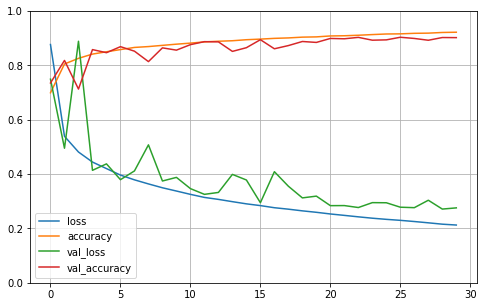

In [14]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [16]:
ev = model.evaluate(X_test_n, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2862 - accuracy: 0.8973


In [17]:
ev

[0.2862228453159332, 0.8973000049591064]

In [18]:
X_new = X_test[:3]

In [19]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [20]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

AxesImage(54,36;334.8x217.44)


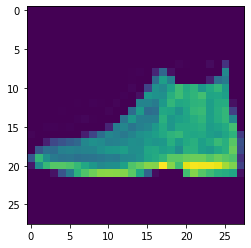

In [21]:
print(plt.imshow(X_test[0].reshape((28,28))))

# Pooling vs No Pooling

In [22]:
model_a = keras.models.Sequential()
model_a.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu',input_shape=(28, 28, 1)))
model_a.add(keras.layers.MaxPooling2D((2, 2)))
model_a.add(keras.layers.Flatten())
model_a.add(keras.layers.Dense(300, activation='relu'))
model_a.add(keras.layers.Dense(100, activation='relu'))
model_a.add(keras.layers.Dense(10, activation='softmax'))

model_b = keras.models.Sequential()
model_b.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu',input_shape=(28, 28, 1)))
model_b.add(keras.layers.Flatten())
model_b.add(keras.layers.Dense(300, activation='relu'))
model_b.add(keras.layers.Dense(100, activation='relu'))
model_b.add(keras.layers.Dense(10, activation='softmax'))

In [23]:
model_a.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               1622700   
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
____________________________________________

In [24]:
model_b.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
flatten_2 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               6489900   
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 6,521,330
Trainable params: 6,521,330
Non-trainable params: 0
_________________________________________________________________


In [25]:
model_a.compile(loss="sparse_categorical_crossentropy",
               optimizer="sgd",
               metrics=["accuracy"])

model_b.compile(loss="sparse_categorical_crossentropy",
               optimizer="sgd",
               metrics=["accuracy"])

In [27]:
model_history_a = model_a.fit(X_train, y_train, epochs=3,batch_size=64,
                             validation_data=(X_valid, y_valid))

Epoch 1/3
860/860 [==============================] - 18s 21ms/step - loss: 0.8465 - accuracy: 0.7085 - val_loss: 0.7927 - val_accuracy: 0.7100
Epoch 2/3
860/860 [==============================] - 19s 22ms/step - loss: 0.5357 - accuracy: 0.8067 - val_loss: 0.4955 - val_accuracy: 0.8100
Epoch 3/3
860/860 [==============================] - 18s 21ms/step - loss: 0.4786 - accuracy: 0.8269 - val_loss: 0.9680 - val_accuracy: 0.6960


In [29]:
model_history_b = model_b.fit(X_train, y_train, epochs=3,batch_size=64,
                             validation_data=(X_valid, y_valid))

Epoch 1/3
860/860 [==============================] - 33s 38ms/step - loss: 0.7398 - accuracy: 0.7452 - val_loss: 0.7276 - val_accuracy: 0.7492
Epoch 2/3
860/860 [==============================] - 33s 38ms/step - loss: 0.4952 - accuracy: 0.8217 - val_loss: 0.4708 - val_accuracy: 0.8202
Epoch 3/3
860/860 [==============================] - 33s 39ms/step - loss: 0.4439 - accuracy: 0.8394 - val_loss: 1.0183 - val_accuracy: 0.6948
